**DATA EXPLORATION**

fluencybank_labels.csv is a dataset containing over 4k clips labeled with five event types including blocks, prolongations, sound repetitions, word repetitions, and interjections. Audio comes from public podcasts consisting of people who stutter interviewing other people who stutter.

**Source:** https://machinelearning.apple.com/research/stuttering-event-detection

**Dataset:** https://github.com/apple/ml-stuttering-events-dataset/

Each 3-second clip was annotated with the following labels by three annotators who were not clinicians but did have training on how to identify each type of stuttering event. Label files contain counts (out of three) corresponding to how many reviewers selected a given label. Multiple labels may be selected for a given clip.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/apple/ml-stuttering-events-dataset/main/fluencybank_labels.csv')
print(df.sample(10)) 

print(df.shape) 

             Show  EpId  ClipId     Start      Stop  Unsure  PoorAudioQuality  \
3109  FluencyBank   173      13   1277120   1325120       0                 0   
3517  FluencyBank   193      83  14353120  14401120       1                 0   
4128  FluencyBank   985     180  12526400  12574400       0                 0   
948   FluencyBank    63     172  11789600  11837600       0                 0   
983   FluencyBank    71      32    146400    194400       0                 0   
2121  FluencyBank    99      22  13536640  13584640       0                 0   
3252  FluencyBank   178      77   2964480   3012480       0                 0   
3086  FluencyBank   147      98   9127200   9175200       0                 0   
1220  FluencyBank    81      52   2185440   2233440       0                 0   
3163  FluencyBank   173      67    263520    311520       0                 0   

      Prolongation  Block  SoundRep  WordRep  DifficultToUnderstand  \
3109             0      3         0  

**Display columns in the dataset**

In [74]:
for col in df.columns:
    print(col)

Show
EpId
ClipId
Start
Stop
Unsure
PoorAudioQuality
Prolongation
Block
SoundRep
WordRep
DifficultToUnderstand
Interjection
NoStutteredWords
NaturalPause
Music
NoSpeech


**Stuttering event labels:**

- **Prolongation:** Elongated syllable (e.g., M[mmm]ommy)

- **Block:** Gasps for air or stuttered pauses

- **Sound Repetition:** Repeated syllables (e.g., I [pr-pr-pr-]prepared dinner)

- **Word Repetition:** The same word or phrase is repeated (e.g., I made [made] dinner)

- **No Stuttered Words:** Confirmation that none of the above is true.

- **Interjection:** Common filler words such as "um" or "uh" or person-specific filler words that individuals use to cope with their stutter (e.g., some users frequently say "you know" as a filler).

**Additional labels:**

- **Unsure:** An annotator selects this if they are not confident in their labeling.

- **Poor Audio Quality:** It is difficult to understand due to, for example, microphone quality.

- **Difficult To Understand:** It is difficult to understand the speech.

- **Natural Pause:** There is a pause in speech that is not considered a block or other disfluency.

- **Music:** There is background music playing (only in SEP-28k)

- **No Speech:** There is no speech in this clip. It is either silent or there is just background noise.

The variable `NoStutteredWords` is the confirmation for the three annotators that `Prolongation` AND `Block` AND `Sound Repetition` AND `Word Repetition` = FALSE (i.e) no stuttered words.

In [75]:
print(df['NoStutteredWords'].value_counts())

NoStutteredWords
3    1438
0    1270
2     804
1     632
Name: count, dtype: int64


In [76]:
check_df = df[['Prolongation', 'Block', 'SoundRep', 'WordRep', 'NoStutteredWords']]
check_df.sample(10)

,Prolongation,Block,SoundRep,WordRep,NoStutteredWords
848,0,0,0,0,3
2971,0,0,0,0,3
3468,0,0,2,0,1
704,0,0,0,0,3
1901,1,0,0,0,2
3585,1,0,0,0,2
2593,1,0,0,0,2
3139,0,1,0,0,2
2524,0,0,0,0,3
1144,2,1,0,1,0


`NoStutteredWords` = 3 if all three annotators confirm `Prolongation` AND `Block` AND `Sound Repetition` AND `Word Repetition` = FALSE.

In simpler terms, `No Stuttered Words` = 3 when all three annotators agree that none of the following stuttering events is present: `Prolongation`, `Block`, `Sound Repetition` or `Word Repetition`.

In [77]:
print(check_df[(check_df['NoStutteredWords'] == 3)])

      Prolongation  Block  SoundRep  WordRep  NoStutteredWords
1                0      0         0        0                 3
5                0      0         0        0                 3
6                0      0         0        0                 3
8                0      0         0        0                 3
9                0      0         0        0                 3
...            ...    ...       ...      ...               ...
4125             0      0         0        0                 3
4126             0      0         0        0                 3
4129             0      0         0        0                 3
4135             0      0         0        0                 3
4143             0      0         0        0                 3

[1438 rows x 5 columns]


There are **1438** reliable data points of individuals who **did not stutter**.

`NoStutteredWords` = 0 if all three annotators confirm `Prolongation` OR `Block` OR `Sound Repetition` OR `Word Repetition` = TRUE.

In simpler terms, `No Stuttered Words` = 0 when all three annotators agree that at least one of the following stuttering events is present: `Prolongation`, `Block`, `Sound Repetition` or `Word Repetition`.

In [78]:
print(check_df[(check_df['NoStutteredWords'] == 0)])

      Prolongation  Block  SoundRep  WordRep  NoStutteredWords
4                0      0         0        3                 0
38               1      2         0        0                 0
75               0      3         0        1                 0
79               0      1         0        3                 0
82               0      1         1        2                 0
...            ...    ...       ...      ...               ...
4137             1      2         1        1                 0
4138             1      2         2        0                 0
4140             0      2         1        0                 0
4141             0      2         2        1                 0
4142             0      0         3        0                 0

[1270 rows x 5 columns]


There are **1270** reliable detection of individuals who displayed at least one characteristic of **stuttering**.

In [79]:
new_df = df.loc[(df['NoStutteredWords'] == 0) | (df['NoStutteredWords'] == 3)]
new_df.shape[0] # 1438 + 1270

2708

Since `Unsure` indicates that the annotator is not confident in their labeling, we delete data points where `Unsure` is not equal to 0.

In [80]:
new_df['Unsure'].value_counts()

Unsure
0    2622
1      82
2       3
3       1
Name: count, dtype: int64

In [81]:
new_df = new_df[new_df['Unsure'] == 0]
new_df.shape[0]

2622

In [82]:
new_df['NoStutteredWords'].value_counts()

NoStutteredWords
3    1427
0    1195
Name: count, dtype: int64

This way, we retain only the most reliable data points for further analysis.

**DATA WRANGLING**

In [83]:
new_df.sample(10)

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause,Music,NoSpeech
254,FluencyBank,17,39,1798240,1846240,0,0,0,0,0,0,0,0,3,0,0,0
847,FluencyBank,63,71,5530560,5578560,0,0,0,0,0,3,0,1,0,0,0,0
1627,FluencyBank,93,37,3440640,3488640,0,0,0,0,0,0,0,0,3,2,0,0
3085,FluencyBank,147,97,8954560,9002560,0,0,0,2,2,0,0,0,0,0,0,0
3493,FluencyBank,193,59,10319200,10367200,0,0,2,0,1,0,0,1,0,0,0,0
2876,FluencyBank,121,131,7609600,7657600,0,0,0,0,0,3,0,0,0,0,0,0
3374,FluencyBank,179,28,3047200,3095200,0,0,0,0,2,1,0,3,0,0,0,0
43,FluencyBank,10,43,5381120,5429120,0,0,0,0,0,0,0,0,3,1,0,0
856,FluencyBank,63,80,6105760,6153760,0,0,0,0,0,0,0,0,3,1,0,0
263,FluencyBank,17,48,2098240,2146240,0,0,0,0,0,0,0,0,3,1,0,0


In [84]:
print(new_df.shape) 

(2622, 17)


**Deleting unnecessary features**




`Show` feature:

In [85]:
print(new_df['Show'].unique())

['FluencyBank']


We can delete this column as it does not hold any meaningful information.

In [86]:
del new_df['Show']

`Music` feature:

In [87]:
print(new_df['Music'].value_counts())

Music
0    2622
Name: count, dtype: int64


There are no entries in the dataset containing music and not speech. So, we can delete this column.

In [88]:
del new_df['Music']

`NoSpeech` feature:

In [89]:
print(new_df['NoSpeech'].value_counts())

NoSpeech
0    2622
Name: count, dtype: int64


All entries in this dataset contain speech. So, we can delete this column as well.

In [90]:
del new_df['NoSpeech']

In [91]:
new_df.sample(10)

,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause
3332,178,157,6577760,6625760,0,0,0,0,0,0,0,0,3,0
852,63,76,5712320,5760320,0,0,0,0,0,3,0,1,0,0
3047,147,59,6360960,6408960,0,0,0,0,0,0,0,0,3,0
1618,93,28,2565280,2613280,0,0,3,1,2,0,0,0,0,0
3257,178,82,3145120,3193120,0,0,3,0,0,0,0,0,0,0
318,19,37,6217280,6265280,0,0,0,0,0,0,0,0,3,1
3561,218,5,1405440,1453440,0,0,0,0,0,0,0,0,3,0
453,24,83,4713920,4761920,0,0,0,0,1,3,0,1,0,0
4032,985,84,5657760,5705760,0,0,0,1,2,0,0,0,0,0
1591,93,1,1093440,1141440,0,0,0,0,0,0,0,0,3,0


`Poor Audio Quality` means difficult to understand due to, for example, microphone quality and `Difficult To Understand` means difficult to understand the speech of the individual.

In [92]:
print(new_df['PoorAudioQuality'].value_counts())

PoorAudioQuality
0    2622
Name: count, dtype: int64


All entries in this dataset contain good-quality audio data. So, we can delete this column as well.

In [93]:
del new_df['PoorAudioQuality']

In [94]:
print(new_df['DifficultToUnderstand'].value_counts())

DifficultToUnderstand
0    2417
1     164
2      36
3       5
Name: count, dtype: int64


We only keep data points where the speech of the person was not difficult to understand.

In [95]:
new_df = new_df[new_df['DifficultToUnderstand'] == 0]
del new_df['DifficultToUnderstand']

In [96]:
new_df.shape

(2417, 12)

In [97]:
print(new_df.sample(10))

      EpId  ClipId     Start      Stop  Unsure  Prolongation  Block  SoundRep  \
3184   178       9   7490880   7538880       0             0      0         0   
2353   107      68   5192960   5240960       0             0      0         0   
1599    93       9   1472800   1520800       0             2      0         3   
3902   230     132   7334880   7382880       0             0      2         1   
634     31      67   5287040   5335040       0             0      0         0   
2026    98      55    184800    232800       0             0      0         0   
3599   218      43   3138560   3186560       0             0      0         0   
2720   118      88  10252960  10300960       0             0      1         2   
2327   107      42   3361120   3409120       0             0      0         0   
1191    81      23   9205280   9253280       0             0      0         0   

      WordRep  Interjection  NoStutteredWords  NaturalPause  
3184        0             0                 3 

We retain `EpId` and `ClipId` for referencing purposes but delete `Unsure`, `Start` and `Stop` features.

In [98]:
del new_df['Unsure']
del new_df['Start']
del new_df['Stop']

In [99]:
print(new_df.sample(10))

      EpId  ClipId  Prolongation  Block  SoundRep  WordRep  Interjection  \
736     46      87             0      0         0        0             0   
3113   173      17             0      0         0        0             1   
1527    89      76             0      1         2        2             0   
2942   132      54             0      0         2        3             0   
3098   173       2             3      1         0        0             0   
1620    93      30             0      0         3        1             0   
117     16      17             1      2         1        0             0   
1794    97      16             0      0         3        0             0   
3936   230     166             0      0         0        0             1   
2248    99     149             1      0         1        2             0   

      NoStutteredWords  NaturalPause  
736                  3             1  
3113                 3             0  
1527                 0             0  
2942   

In [100]:
new_df['NoStutteredWords'].value_counts()

NoStutteredWords
3    1367
0    1050
Name: count, dtype: int64

Since there is a slight class imbalance in the dataset, downsampling was performed on the majority class.

In [101]:
class_3 = new_df[new_df['NoStutteredWords'] == 3]
class_0 = new_df[new_df['NoStutteredWords'] == 0]

class_3_downsampled = class_3.sample(n = 1050, random_state = 0)

new_df_downsampled = pd.concat([class_3_downsampled, class_0])

new_df = new_df_downsampled.sample(frac = 1, random_state = 0).reset_index(drop = True)

new_df['NoStutteredWords'].value_counts()

NoStutteredWords
0    1050
3    1050
Name: count, dtype: int64

*(Purely for easier/intuitive understanding)*

Creating target variable `Stutter` = 1 where `NoStutteredWords` = 0 and `Stutter` = 0 where `NoStutteredWords` = 3.

In [102]:
import numpy as np

new_df['Stutter'] = new_df['NoStutteredWords'].apply(lambda x: 1 if x == 0 else 0 if x == 3 else None)
print(new_df.sample(10))

      EpId  ClipId  Prolongation  Block  SoundRep  WordRep  Interjection  \
2088   193      78             0      1         2        1             0   
866    219      92             0      0         0        0             0   
1706   111      57             0      0         0        0             0   
2013    97     171             0      1         2        0             0   
73     132      63             0      1         2        0             0   
722     89      53             0      0         0        0             0   
101     98     106             0      2         1        0             0   
2017   179      52             0      0         0        0             0   
1389   985      16             0      3         0        0             1   
1252   178      41             3      0         0        0             0   

      NoStutteredWords  NaturalPause  Stutter  
2088                 0             0        1  
866                  3             0        0  
1706               

In [103]:
del new_df['NoStutteredWords']

In [104]:
print(new_df.sample(10))

      EpId  ClipId  Prolongation  Block  SoundRep  WordRep  Interjection  \
1170   118     111             2      0         2        0             1   
332    218      25             0      0         0        0             1   
1036    46      44             0      0         0        0             0   
791    219      95             0      0         0        0             0   
505    219      53             0      0         0        0             0   
1602   111      45             0      0         0        0             0   
1020    97     144             0      0         0        0             3   
897    147      67             0      1         1        2             3   
266    121      65             0      0         0        0             2   
1331    99     125             1      1         0        2             3   

      NaturalPause  Stutter  
1170             0        1  
332              0        0  
1036             1        0  
791              0        0  
505          

Considering `Prolongation`, `Block`, `SoundRep`, `WordRep`, `Interjection` and `NaturalPause` as the predictor variables and `Stutter` as the target variable.

In [105]:
final_df = new_df.filter(['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection', 'NaturalPause', 'Stutter'], axis = 1)
final_df['Prolongation'] = np.where(final_df['Prolongation'] != 0, 1, 0)
final_df['Block'] = np.where(final_df['Block'] != 0, 1, 0)
final_df['SoundRep'] = np.where(final_df['SoundRep'] != 0, 1, 0)
final_df['WordRep'] = np.where(final_df['WordRep'] != 0, 1, 0)
final_df['Interjection'] = np.where(final_df['Interjection'] != 0, 1, 0)
final_df['NaturalPause'] = np.where(final_df['NaturalPause'] != 0, 1, 0)

print(final_df.sample(10))
print(final_df.shape)

      Prolongation  Block  SoundRep  WordRep  Interjection  NaturalPause  \
1633             0      0         0        0             0             0   
1701             0      0         0        1             0             0   
823              0      1         1        0             0             0   
1564             0      0         0        0             0             1   
1019             0      0         0        0             0             1   
1342             0      0         0        0             0             0   
65               0      0         0        0             0             1   
1198             0      0         0        0             0             0   
1496             0      1         0        1             0             0   
236              0      1         1        0             1             1   

      Stutter  
1633        0  
1701        1  
823         1  
1564        0  
1019        0  
1342        0  
65          0  
1198        0  
1496        1  
236

**Correlation Heat Map:** finding correlation between `Stutter` and its predictor variables: `Prolongation`, `Block`, `SoundRep`, `WordRep`, `Interjection`, `NaturalPause`.

<Axes: >

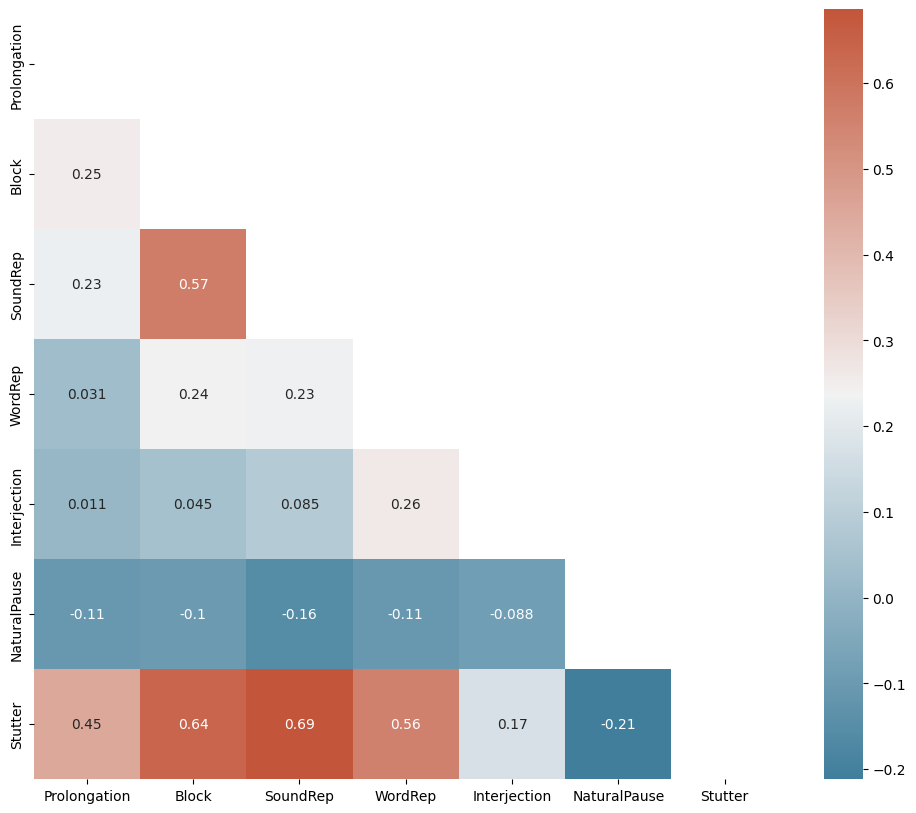

In [106]:
final_df.columns = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection', 'NaturalPause', 'Stutter']

corr = final_df.corr()

import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize = (12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype = bool))

import seaborn as sns
cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(corr, annot = True, mask = mask, cmap = cmap)

From the last 6 boxes in the heat map,

- We can see that the variables `Prolongation`, `Block`, `SoundRep` and `WordRep` are strongly correlated with `Stutter` which stores data on the correct labelling of stuttered words. 

- The variables `Interjection` and `NaturalPause` have little to negative correlation with `Stutter`.

**MACHINE LEARNING MODEL BUILDING**

Using `LogisticRegression` as it is always advisable to use the simplest binary classification model and increase model complexity if better prediction models are required.

In [ ]:
feature_names = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection', 'NaturalPause']
X = final_df[feature_names]
y = final_df['Stutter']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy of the model on train data: {:.2f}'.format(train_accuracy))
print('Accuracy of the model on test data: {:.2f}'.format(test_accuracy))
print('Classification Report\n', classification_report(y_test, y_test_pred))

Accuracy of the model on train data: 0.99
Accuracy of the model on test data: 1.00
Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       321
           1       1.00      0.99      1.00       309

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



The model performance is high but concerning...

So, cross-validation was performed 10 times to check if the high accuracy was by chance and turns out, it's not...

In [110]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv = 10)
print("Mean model test accuracy from cross-validation:", round(scores.mean(), 2))
print([round(score, 2) for score in scores])

Mean model test accuracy from cross-validation: 0.99
[1.0, 1.0, 0.99, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0]


Multicollinearity can affect linear models like logistic regression model so correlation among features was checked.

In [114]:
corr = X.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print("Columns to drop due to high correlation (>90%):", X.columns[to_drop].tolist())

Columns to drop due to high correlation (>90%): []


Double checking multicollinearity using Variance Inflation Factor (VIF)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant term for intercept
X = add_constant(X)

vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

        feature       VIF
0         const  2.792929
1  Prolongation  1.088453
2         Block  1.557049
3      SoundRep  1.546724
4       WordRep  1.153835
5  Interjection  1.077966
6  NaturalPause  1.040812


It seems like there is no multicollinearity among features so the 6 predictors are actually indicative of stutter (target variable).

There are a total of 63 possible feature combinations. The dataframe below presents the training and testing accuracies of the logistic regression model in stutter detection, evaluated across different feature combinations.

In [118]:
import itertools

feature_combos = []
train_accuracies = []
test_accuracies = []

combos = []
for feature in range(1, len(feature_names) + 1):
    combos.extend(itertools.combinations(feature_names, feature))

for combo in combos:
    X_train_combo = X_train[list(combo)]
    X_test_combo = X_test[list(combo)]
    
    model = LogisticRegression().fit(X_train_combo, y_train)
    
    y_train_pred = model.predict(X_train_combo)
    y_test_pred = model.predict(X_test_combo)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    feature_combos.append(', '.join(combo))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

feature_combo_accuracies = pd.DataFrame({
    'feature_combos': feature_combos,
    'train_accuracies': [round(train_acc, 2) for train_acc in train_accuracies],
    'test_accuracies': [round(test_acc, 2) for test_acc in test_accuracies]
})

feature_combo_accuracies

,feature_combos,train_accuracies,test_accuracies
0,Prolongation,0.67,0.66
1,Block,0.79,0.79
2,SoundRep,0.82,0.81
3,WordRep,0.73,0.77
4,Interjection,0.58,0.60
...,...,...,...
58,"Prolongation, Block, SoundRep, Interjection, N...",0.94,0.94
59,"Prolongation, Block, WordRep, Interjection, Na...",0.97,0.97
60,"Prolongation, SoundRep, WordRep, Interjection,...",0.99,0.99
61,"Block, SoundRep, WordRep, Interjection, Natura...",0.97,0.97


Checking for fitting issues

In [121]:
feature_combo_accuracies['acc_diff'] = (feature_combo_accuracies['train_accuracies'] - feature_combo_accuracies['test_accuracies']).abs()
feature_combo_accuracies[feature_combo_accuracies['acc_diff'] > 0.05]

,feature_combos,train_accuracies,test_accuracies,acc_diff


For each feature combination, the train and test accuracies are comparable. There is no overfitting or underfitting.

**FEATURE IMPORTANCE**

Checking the impact of each feature on model accuracy

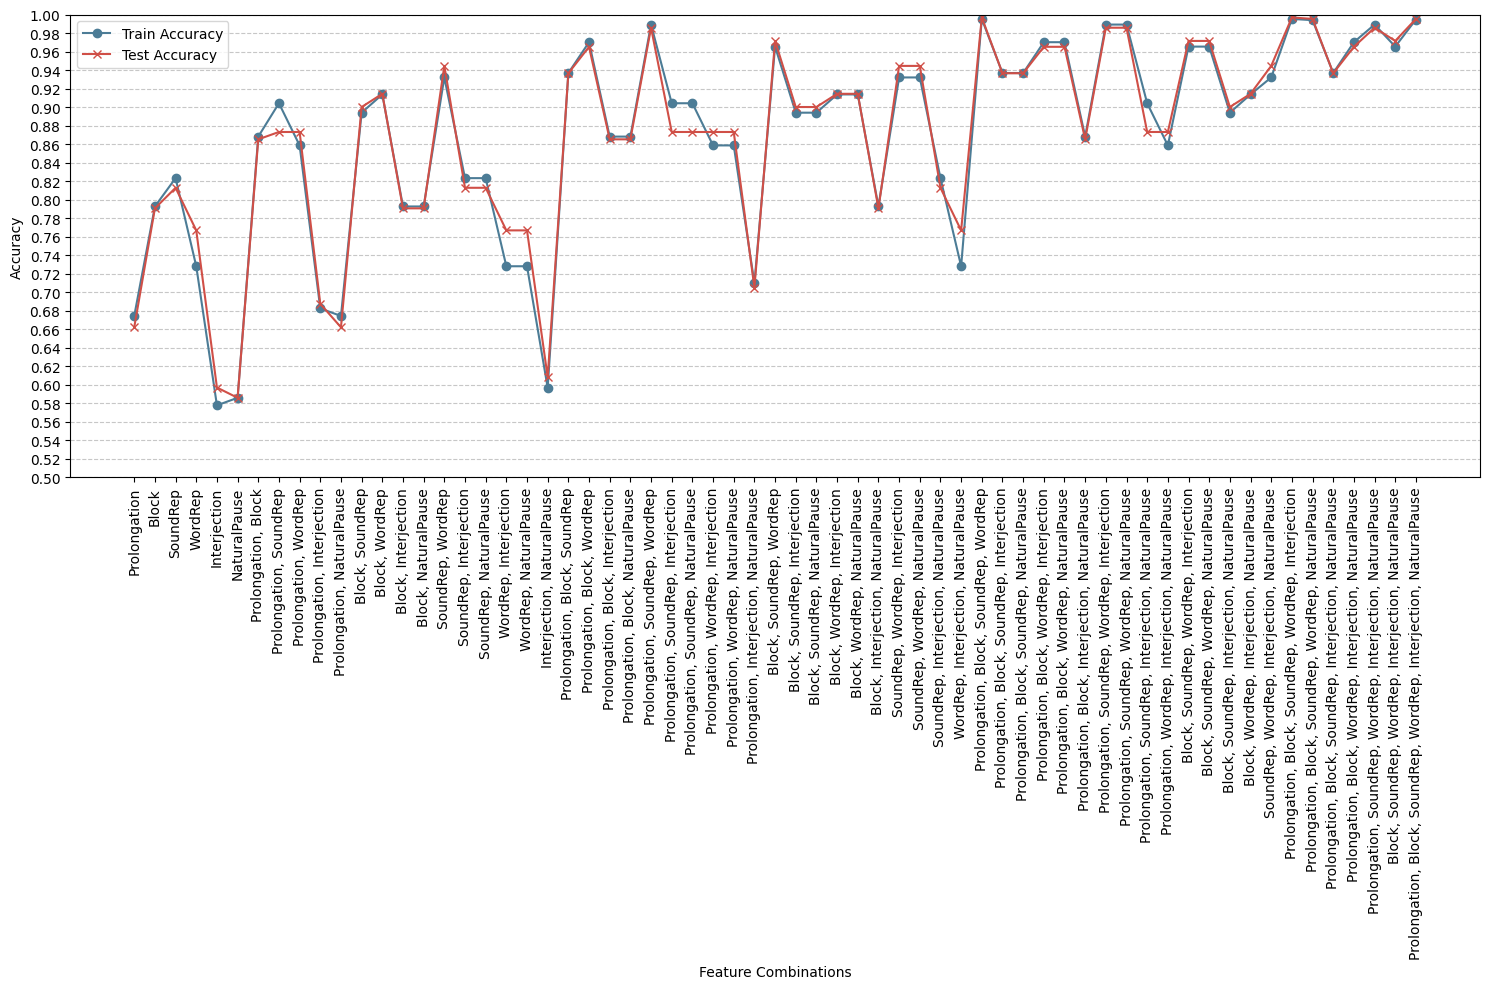

In [122]:
plt.figure(figsize = (15, 10))
train_line, = plt.plot(feature_combos, train_accuracies, label = 'Train Accuracy', color = '#4C7C96', marker = 'o')
test_line, = plt.plot(feature_combos, test_accuracies, label = 'Test Accuracy', color = '#D04F47', marker = 'x')

plt.xticks(rotation = 90)
plt.xlabel('Feature Combinations')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.yticks(np.arange(0.5, 1.01, 0.02))
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.legend()
plt.tight_layout()
plt.show()

Checking which features to prioritize extracting for full-fledged prototype

In [125]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

for feature in range(1, X.shape[1]-1):
    chi2_selector = SelectKBest(chi2, k = feature)
    features_kbest = chi2_selector.fit_transform(X, y)
    mask = chi2_selector.get_support()
    selected_features = X.columns[mask]
    print(feature, "selected features:", selected_features.tolist())

1 selected features: ['SoundRep']
2 selected features: ['Block', 'SoundRep']
3 selected features: ['Block', 'SoundRep', 'WordRep']
4 selected features: ['Prolongation', 'Block', 'SoundRep', 'WordRep']
5 selected features: ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'NaturalPause']
